In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

In [179]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [255]:
dataset = pd.read_csv("../Housing.csv")
#X_train = dataset.iloc[:, 1:5].values
#y_train = dataset.iloc[:, 0].values
#X_features = ["area", "bedroom", "bathrooms", "floors"]
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [256]:
def display_x_train(X_train, X_features):
    fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(X_train[:, i], y_train, c="b")
        ax[i].set_xlabel(X_features[i])
    plt.show()

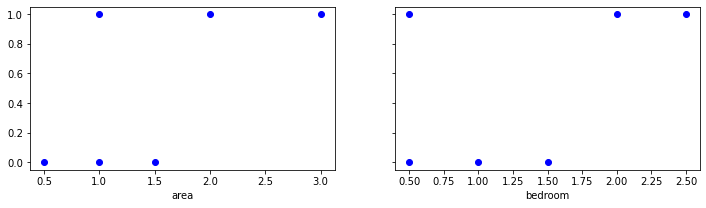

In [244]:
display_x_train(X_train, X_features)

In [245]:
#max_X = copy.deepcopy(X_train[0])
#for i in range(len(X_train)):
#    for j in range(4):
#        max_X[j] = max(max_X[j], X_train[i][j])
#X_train = X_train / max_X

#X_train, X_mu, x_sigma = z_score_normalization(X_train)
#y_train = y_train / 10000

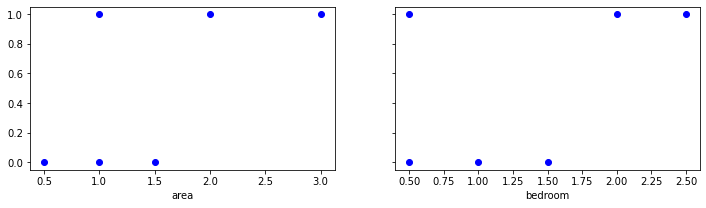

In [246]:
display_x_train(X_train, X_features)

In [257]:
def compute_cost(x, y, w, b):
    m, n = x.shape
    j_wb = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        j_wb += (f_wb - y[i]) ** 2
    return j_wb / (2 * m)

In [258]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
        
    return dj_dw / m, dj_db / m

In [259]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
        if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_hist[-1]}   ")
    return w, b, j_hist

In [261]:
alpha = 0.1
num_iter = 3000
w_in = np.zeros(X_train.shape[1])
b_in = 0

w, b, j_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)

Iteration    0: Cost 0.10712962962962962   
Iteration  300: Cost 0.005760847816366283   
Iteration  600: Cost 0.004717257566911965   
Iteration  900: Cost 0.004699553640515612   
Iteration 1200: Cost 0.004699253303280751   
Iteration 1500: Cost 0.004699248208227111   
Iteration 1800: Cost 0.0046992481217923605   
Iteration 2100: Cost 0.004699248120326045   
Iteration 2400: Cost 0.004699248120301183   
Iteration 2700: Cost 0.004699248120300765   


In [262]:
w, b

(array([0.58646616, 0.56390977]), -1.1315789456259682)

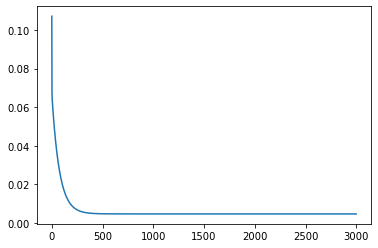

In [263]:
plt.plot(j_hist)
plt.show()

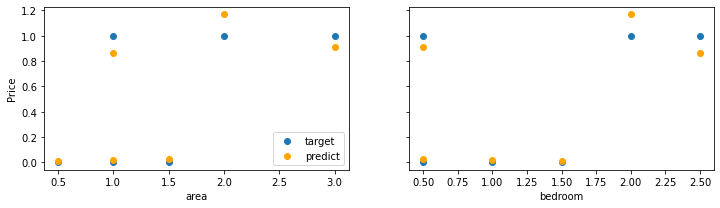

In [264]:
m, n = X_train.shape
yp = np.zeros(m)

for i in range(m):
    yp[i] = np.dot(X_train[i], w) + b
    
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], yp, c="orange", label="predict")
ax[0].set_ylabel("Price")
ax[0].legend()
plt.show()

In [265]:
print(yp[:10])
print(y_train[:10])

[0.0075188  0.01879699 0.03007519 0.90977444 1.16917293 0.86466165]
[0 0 0 1 1 1]


In [266]:
def compute_z(x, w, b):
    m, n = x.shape
    
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(x[i], w) + b
    return f_wb

In [267]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

[0.50187969 0.50469911 0.50751823 0.712954   0.76299549 0.70363369]


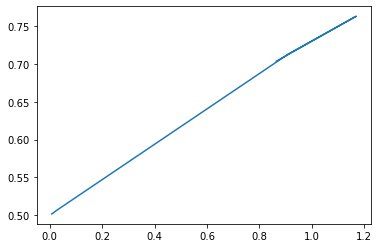

In [270]:
z = compute_z(X_train, w, b)
y = sigmoid(z)
print(y)
plt.plot(z, y)
plt.show()